# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create query to retrieve response from Openweather for weather data
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "standard"
query_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}"
weather_response = requests.get(query_url).json()
print(json.dumps(weather_response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -54.8,
        "lon": -68.3
    },
    "dt": 1584017313,
    "id": 3833367,
    "main": {
        "feels_like": 279.26,
        "humidity": 93,
        "pressure": 1004,
        "temp": 281.6,
        "temp_max": 282.15,
        "temp_min": 281.15
    },
    "name": "Ushuaia",
    "sys": {
        "country": "AR",
        "id": 8303,
        "sunrise": 1584008382,
        "sunset": 1584054365,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 2.47
    }
}


In [4]:
#Define url and units for Openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "standard"

#Create record counter to capture the number for each city
city_record_count = 1

#Create empty lists to return weather details for each city
name_of_city = []
clouds = []
country = []
dt = []
humidity = []
lat = []
lon = []
temp_max = []
wind = []

#Loop through cities in cities list
for city in cities:
#When city name is found from search from Openweather site, append to list    
    try:
        response = requests.get(f"{url}appid={weather_api_key}&q={city}&units={units}").json()
        name_of_city.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        city_record = response['name']
        print(f"Processing Record {city_record_count} | {city_record}")
    
        city_record_count = city_record_count + 1
        
        time.sleep(1.01)
        
    except:
        print("City not found....skipping.")
        
    continue
    
    



Processing Record 1 | Ushuaia
Processing Record 2 | Remontnoye
Processing Record 3 | Noboribetsu
City not found....skipping.
Processing Record 4 | Vaini
Processing Record 5 | Provideniya
City not found....skipping.
Processing Record 6 | Dikson
City not found....skipping.
Processing Record 7 | Lagoa
Processing Record 8 | Marawi
Processing Record 9 | Coahuayana Viejo
Processing Record 10 | Punta Arenas
Processing Record 11 | Bairiki Village
Processing Record 12 | Iqaluit
City not found....skipping.
City not found....skipping.
Processing Record 13 | Ostrovnoy
Processing Record 14 | Ribeira Grande
Processing Record 15 | Saint-Philippe
Processing Record 16 | Rikitea
Processing Record 17 | Tasiilaq
Processing Record 18 | Hualmay
Processing Record 19 | Henties Bay
Processing Record 20 | Laas
Processing Record 21 | Hirara
Processing Record 22 | Kavieng
Processing Record 23 | Mar del Plata
City not found....skipping.
Processing Record 24 | Lebu
Processing Record 25 | Bambous Virieux
Processing 

Processing Record 226 | Chișinău
City not found....skipping.
Processing Record 227 | Atar
Processing Record 228 | Acapulco de Juárez
Processing Record 229 | Qaqortoq
Processing Record 230 | Nachingwea
Processing Record 231 | Rapid City
Processing Record 232 | Angoche
Processing Record 233 | San Ramon
Processing Record 234 | Manicoré
Processing Record 235 | Choya
Processing Record 236 | Caravelas
Processing Record 237 | Saskylakh
Processing Record 238 | Vostok
Processing Record 239 | Manta
Processing Record 240 | Kumul
Processing Record 241 | Dauphin
Processing Record 242 | Rocha
Processing Record 243 | Surat
Processing Record 244 | La Ligua
Processing Record 245 | Jiayuguan City
Processing Record 246 | Itarema
Processing Record 247 | Cañon City
Processing Record 248 | Koumac
Processing Record 249 | Alliston
Processing Record 250 | Phonhong
Processing Record 251 | Bilibino
Processing Record 252 | Krasnosel'kup
Processing Record 253 | Lavrentiya
Processing Record 254 | Yārāda
Processing 

Processing Record 455 | Mwingi
Processing Record 456 | Caronport
Processing Record 457 | Mareeba
Processing Record 458 | Verāval
Processing Record 459 | São Manuel
City not found....skipping.
Processing Record 460 | Saint-Pierre
City not found....skipping.
Processing Record 461 | Necochea
Processing Record 462 | Chicama
Processing Record 463 | Luena
Processing Record 464 | Bonawon
Processing Record 465 | San Cristobal
Processing Record 466 | Calatayud
Processing Record 467 | Agulu
Processing Record 468 | Vila Franca do Campo
Processing Record 469 | Den Helder
Processing Record 470 | Te Anau
Processing Record 471 | Tura
Processing Record 472 | La Palma
Processing Record 473 | Tomatlán
Processing Record 474 | West Wendover
Processing Record 475 | Solnechnogorsk
Processing Record 476 | Puerto del Rosario
Processing Record 477 | Lázaro Cárdenas
City not found....skipping.
Processing Record 478 | Launceston
Processing Record 479 | Pauini
Processing Record 480 | Prabumulih
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_df = pd.DataFrame({"City": name_of_city, "Cloudiness": clouds, "Country": country, "Date": dt, 
                            "Humidity": humidity, "Lat": lat, "Lng": lon, "Max Temp": temp_max, 
                            "Wind Speed": wind})
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,40,AR,1584017313,93,-54.80,-68.30,282.15,2.47
1,Remontnoye,72,RU,1584017461,62,46.56,43.65,287.04,12.07
2,Noboribetsu,75,JP,1584017462,59,42.45,141.17,276.15,4.10
3,Vaini,90,TO,1584017464,94,-21.20,-175.20,298.15,1.00
4,Provideniya,100,RU,1584017465,98,64.38,-173.30,269.59,5.21


In [6]:
output_data_file = "output_data/cities.csv"
city_data_df.to_csv("cities.csv", encoding="utf-8", index=False)

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

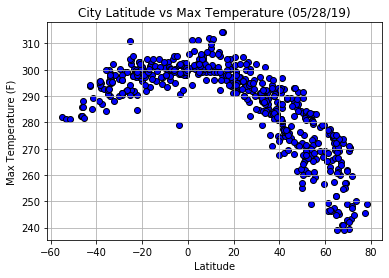

In [8]:
plt.scatter(lat, temp_max, marker = 'o', color='blue', edgecolors = 'black')
plt.title("City Latitude vs Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

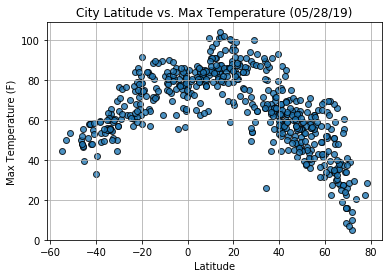

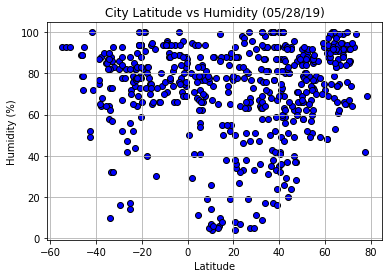

In [13]:
plt.scatter(lat, humidity, marker = 'o', color='blue', edgecolors = 'black')
plt.title("City Latitude vs Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#plt.ylim(300)
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

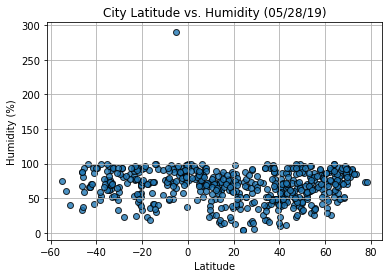

#### Latitude vs. Cloudiness Plot

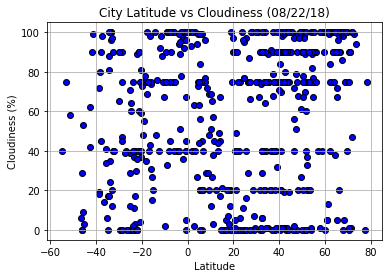

In [14]:
plt.scatter(lat, clouds, marker = 'o', color='blue', edgecolors = 'black')
plt.title("City Latitude vs Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

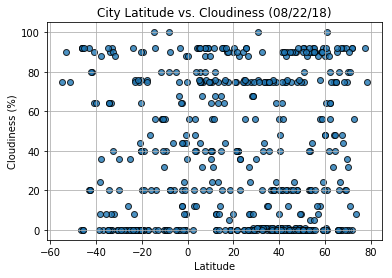

#### Latitude vs. Wind Speed Plot

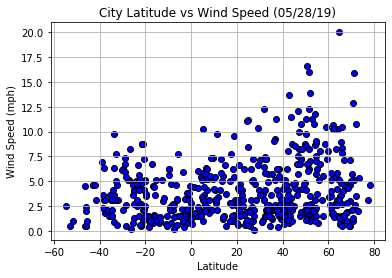

In [15]:
plt.scatter(lat, wind, marker = 'o', color='blue', edgecolors = 'black')
plt.title("City Latitude vs Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#plt.ylim(300)
plt.grid()
plt.show()

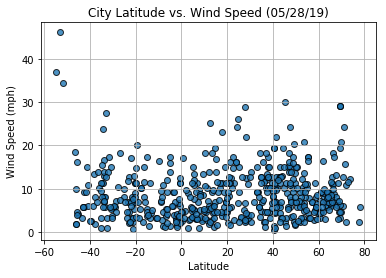

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [58]:
northern_hemi = city_data_df["Lat"].between(0, 90, inclusive = True) 
   
city_data_df[northern_hemi] 


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Remontnoye,72,RU,1584017461,62,46.56,43.65,287.04,12.07
2,Noboribetsu,75,JP,1584017462,59,42.45,141.17,276.15,4.10
4,Provideniya,100,RU,1584017465,98,64.38,-173.30,269.59,5.21
5,Dikson,94,RU,1584017466,99,73.51,80.55,250.29,5.35
6,Lagoa,32,PT,1584017467,67,39.05,-27.98,287.79,5.25
...,...,...,...,...,...,...,...,...,...
542,Cayenne,75,GF,1584018070,62,4.93,-52.33,302.15,5.10
543,Ekibastuz,0,KZ,1584018071,77,51.67,75.37,271.29,2.57
544,Lanzhou,20,CN,1584017912,50,36.06,103.79,275.37,9.00
546,Douglas,1,US,1584018075,81,41.30,-96.17,287.15,4.60


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8747727449671436


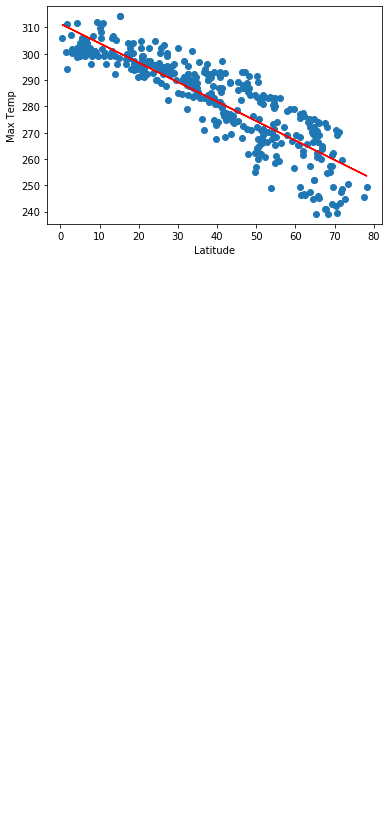

In [75]:
x_values = city_data_df[northern_hemi]["Lat"]
y_values = city_data_df[northern_hemi]["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.8151657406810827


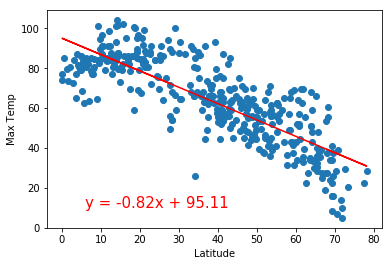

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [63]:
southern_hemi = city_data_df["Lat"].between(-90, 0, inclusive = True) 
   
city_data_df[southern_hemi] 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,40,AR,1584017313,93,-54.80,-68.30,282.15,2.47
3,Vaini,90,TO,1584017464,94,-21.20,-175.20,298.15,1.00
9,Punta Arenas,75,CL,1584017398,93,-53.15,-70.92,281.15,0.50
14,Saint-Philippe,90,RE,1584017476,94,-21.36,55.77,303.15,8.70
15,Rikitea,17,PF,1584017477,82,-23.12,-134.97,297.79,6.67
...,...,...,...,...,...,...,...,...,...
525,Bauru,0,BR,1584018000,78,-22.31,-49.06,299.15,5.10
531,Mpongwe,76,ZM,1584018058,73,-13.51,28.16,299.49,1.40
535,Iquitos,40,PE,1584018062,100,-3.75,-73.25,279.15,1.00
540,Oranjemund,0,NA,1584018068,52,-28.55,16.43,296.19,5.45


The r-squared is: 0.5865907848001668


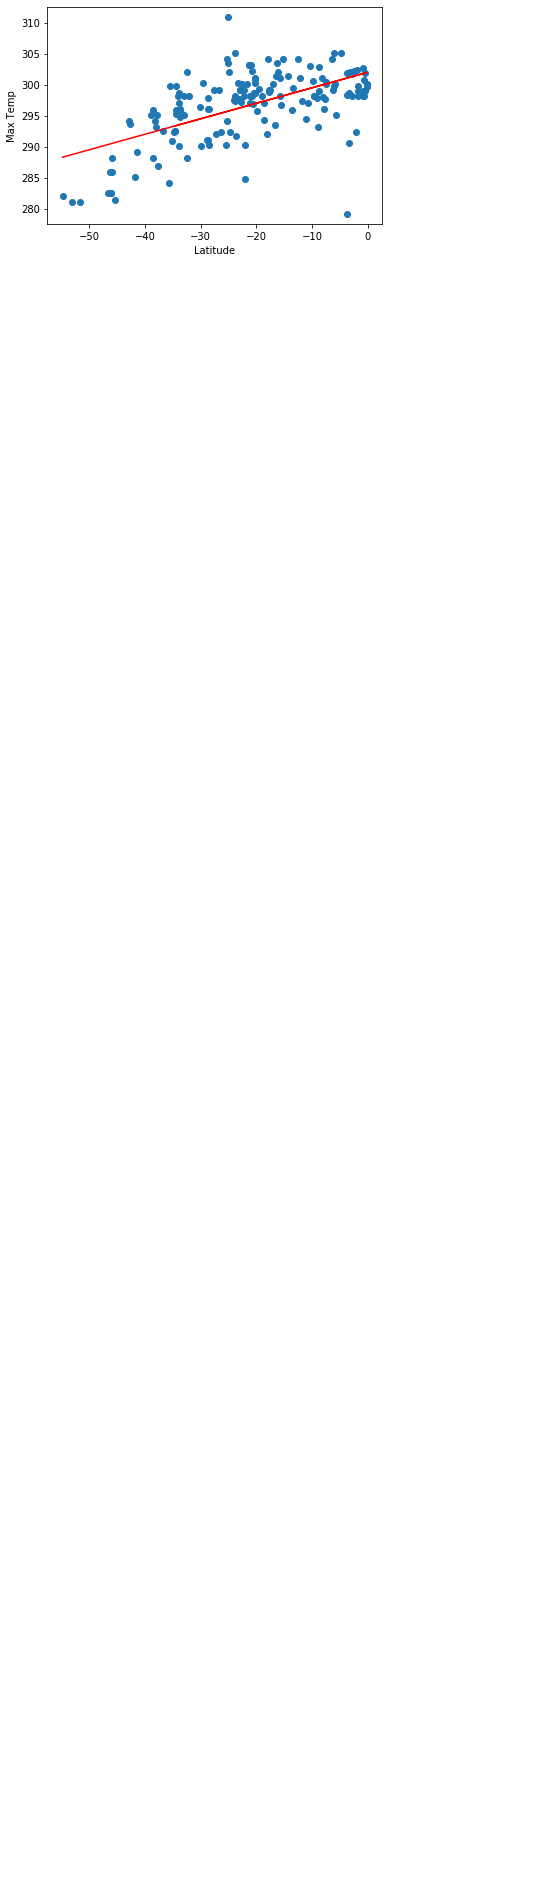

In [72]:
x_values = city_data_df[southern_hemi]["Lat"]
y_values = city_data_df[southern_hemi]["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.760263355051646


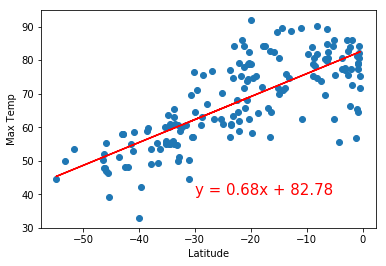

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3040245339514636


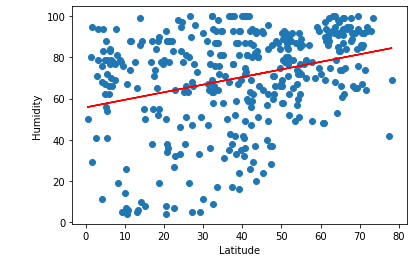

In [65]:
x_values = city_data_df[northern_hemi]["Lat"]
y_values = city_data_df[northern_hemi]["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.10358336015746494


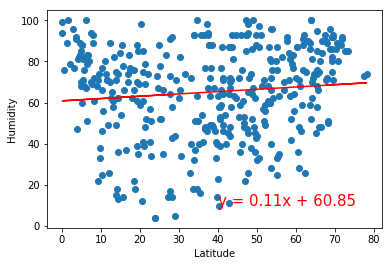

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12778372851956601


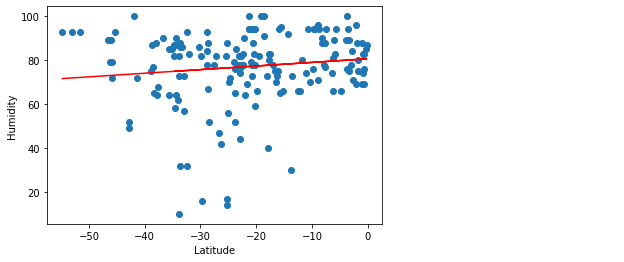

In [66]:
x_values = city_data_df[southern_hemi]["Lat"]
y_values = city_data_df[southern_hemi]["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,32),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.14689473425583055


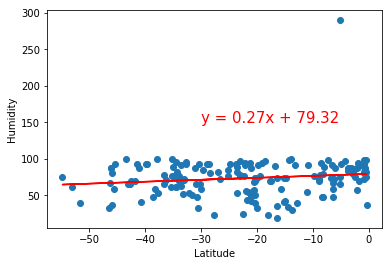

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27082449192308505


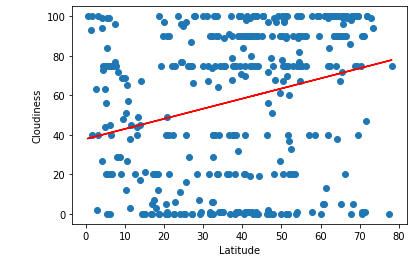

In [67]:
x_values = city_data_df[northern_hemi]["Lat"]
y_values = city_data_df[northern_hemi]["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.08733547918934018


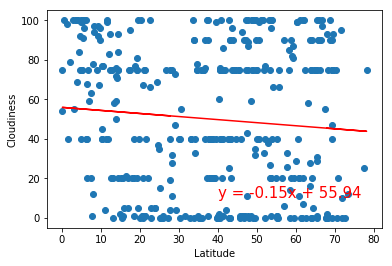

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2936774559911532


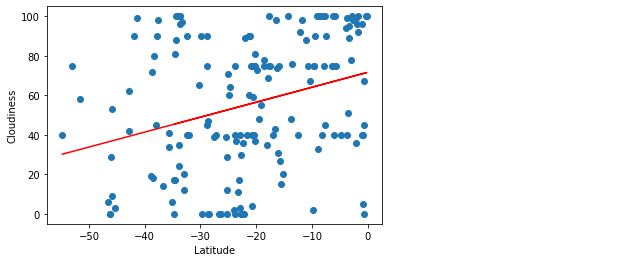

In [68]:
x_values = city_data_df[southern_hemi]["Lat"]
y_values = city_data_df[southern_hemi]["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,32),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.21881426893991618


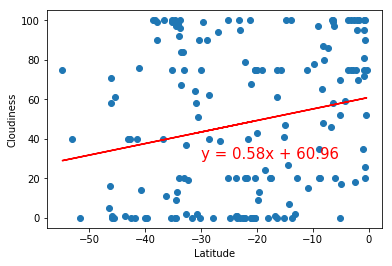

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15657723372038607


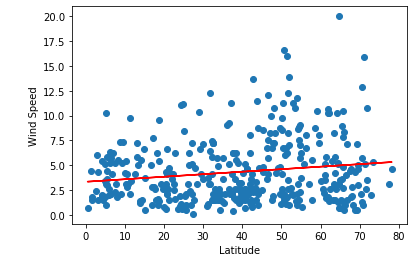

In [69]:
x_values = city_data_df[northern_hemi]["Lat"]
y_values = city_data_df[northern_hemi]["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.1071382774388479


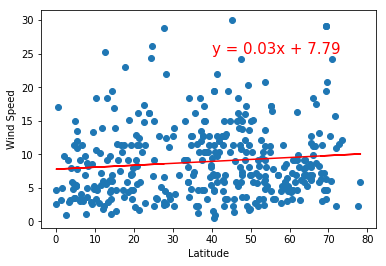

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12188217818705699


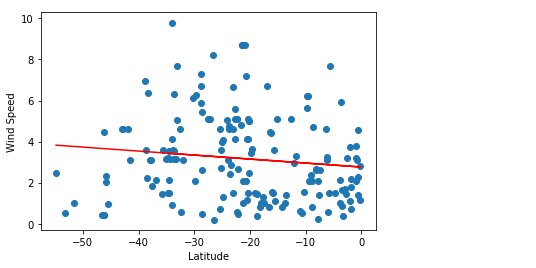

In [71]:
x_values = city_data_df[southern_hemi]["Lat"]
y_values = city_data_df[southern_hemi]["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.322483077139538


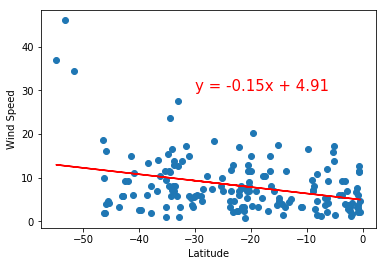